**HOUSE PRICE PROJECT**

**Data Description**

**Load data**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load dataset
house_train_data = pd.read_csv('train.csv')
house_test_data = pd.read_csv('test.csv')

In [3]:
house_train_data.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
house_test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Combine train_data and test_data**

In [5]:
#Target value
target = house_train_data['SalePrice']

In [6]:
train1 = house_train_data.drop(['Id', 'SalePrice'], axis = 1)
test1 = house_test_data.drop('Id', axis = 1)

data = pd.concat([train1, test1], axis = 0).reset_index(drop=True)

In [7]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


**Missing value**

In [8]:
# Check missing values in data_1
feature_cols = data.columns
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isna().sum()
        if missing_count > 0:
              print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")

display_missing(data, feature_cols)

MSZoning has 0.14% missing values.
LotFrontage has 16.65% missing values.
Alley has 93.22% missing values.
Utilities has 0.07% missing values.
Exterior1st has 0.03% missing values.
Exterior2nd has 0.03% missing values.
MasVnrType has 0.82% missing values.
MasVnrArea has 0.79% missing values.
BsmtQual has 2.77% missing values.
BsmtCond has 2.81% missing values.
BsmtExposure has 2.81% missing values.
BsmtFinType1 has 2.71% missing values.
BsmtFinSF1 has 0.03% missing values.
BsmtFinType2 has 2.74% missing values.
BsmtFinSF2 has 0.03% missing values.
BsmtUnfSF has 0.03% missing values.
TotalBsmtSF has 0.03% missing values.
Electrical has 0.03% missing values.
BsmtFullBath has 0.07% missing values.
BsmtHalfBath has 0.07% missing values.
KitchenQual has 0.03% missing values.
Functional has 0.07% missing values.
FireplaceQu has 48.65% missing values.
GarageType has 5.38% missing values.
GarageYrBlt has 5.45% missing values.
GarageFinish has 5.45% missing values.
GarageCars has 0.03% missing 

**a) Categorical missing values**

In [9]:
# Ensure proper data type
data['MSSubClass'] = data['MSSubClass'].astype(str)

In [10]:
# Check missing value
columns_with_null_train = data.columns[data.isnull().any()].tolist()

# Filter out columns with categorical values
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Combine two column lists to get null and categorical columns
filtered_columns = list(set(columns_with_null_train) & set(categorical_columns))

print(filtered_columns)

['GarageFinish', 'MiscFeature', 'KitchenQual', 'BsmtExposure', 'GarageQual', 'MSZoning', 'Fence', 'FireplaceQu', 'PoolQC', 'Exterior2nd', 'GarageCond', 'Utilities', 'BsmtFinType2', 'GarageType', 'MasVnrType', 'Alley', 'Exterior1st', 'BsmtFinType1', 'BsmtQual', 'SaleType', 'Electrical', 'BsmtCond', 'Functional']


In [11]:
data_2 = data.copy()
# Impute using a constant value
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    data_2[column] = data_2[column].fillna("None")

# Impute using the column mode
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    data_2[column] = data_2[column].fillna(data_2[column].mode()[0])

In [12]:
display_missing(data_2, feature_cols)

LotFrontage has 16.65% missing values.
MasVnrArea has 0.79% missing values.
BsmtFinSF1 has 0.03% missing values.
BsmtFinSF2 has 0.03% missing values.
BsmtUnfSF has 0.03% missing values.
TotalBsmtSF has 0.03% missing values.
BsmtFullBath has 0.07% missing values.
BsmtHalfBath has 0.07% missing values.
GarageYrBlt has 5.45% missing values.
GarageCars has 0.03% missing values.
GarageArea has 0.03% missing values.


**b) Numeric missing values**

Dùng mô hình KNN để dự đoán các giá trị nan, sau đó điền vào các vị trí còn thiếu.

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
def knn_impute(df, na_target):
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns

    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    df.loc[df[na_target].isna() == True, na_target] = y_pred

    return df

In [15]:
numeric_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                   'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
for column in numeric_columns:
    data_2 = knn_impute(data_2, column)

In [16]:
display_missing(data_2, feature_cols)

**Feature Transformations**

In [17]:
numeric_val = data_2.select_dtypes(np.number)
numeric_val

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
2915,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
2916,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
2917,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [ ]:
numeric_val.hist(figsize = (25, 20))

Giá trị skewness (độ lệch) có thể được đánh giá như sau:

- Nếu skewness = 0: Phân phối đối xứng (symmetric distribution), không có lệch.
- Nếu skewness < 0: Dữ liệu bị lệch trái (skewed left), có đuôi phân phối bên trái dài hơn so với bên phải.
- Nếu skewness > 0: Dữ liệu bị lệch phải (skewed right), có đuôi phân phối bên phải dài hơn so với bên trái.
-  https://tuihoctaichinh.com/quant-do-lech-skewness/

In [18]:
import scipy.stats
skew_df = pd.DataFrame(data_2.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data_2[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [19]:
for i in skew_df.query("Skewed == True")['Feature']:
    data_2[i] = np.log1p(data_2[i])

In [20]:
data_2.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,2,2008,WD,Normal
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.000000,5,2007,WD,Normal
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,9,2008,WD,Normal
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.000000,2,2006,WD,Abnorml
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.000000,12,2008,WD,Normal
5,50,RL,4.454347,9.555064,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,MnPrv,Shed,6.552508,10,2009,WD,Normal
6,20,RL,4.330733,9.218804,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,8,2007,WD,Normal
7,60,RL,4.239887,9.247925,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,Shed,5.860786,11,2009,WD,Normal
8,50,RM,3.951244,8.719481,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.000000,4,2008,WD,Abnorml
9,190,RL,3.931826,8.912069,Pave,None,Reg,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.000000,1,2008,WD,Normal


**Encoded Categorical values**

In [21]:
data_2 = pd.get_dummies(data_2)
data_2.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0


**Scaling**

In [22]:
data_3 = data_2.copy()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_3)

StandardScaler()

In [23]:
data_3 = pd.DataFrame(scaler.transform(data_3), index = data_3.index, columns = data_3.columns)
data_3.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


**Target transformation**

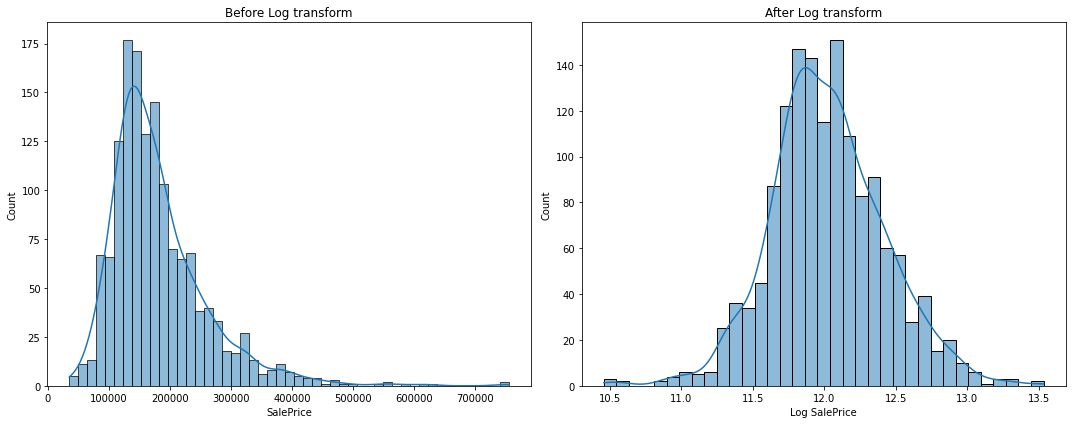

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Vẽ histogram trên từng subplot
sns.histplot(target, kde = True, ax=axs[0])
axs[0].set_title('Before Log transform')

sns.histplot(np.log1p(target), kde = True, ax=axs[1])
axs[1].set_title('After Log transform')
plt.xlabel('Log SalePrice')

plt.tight_layout()

plt.show()

**Split train and test data**

In [25]:
train_final = data_3.loc[:house_train_data.index.max(), :].copy()
test_final = data_3.loc[house_train_data.index.max() + 1:, :].reset_index(drop=True).copy()

In [26]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804554,-1.418196,-0.363076,0.660828,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021136,0.820898,2.351183,0.403330,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804554,0.467619,-0.363076,0.616343,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,0.066112,0.170303,-0.772552,0.454875,-0.696444,0.561757,-0.804554,-0.105594,3.329113,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [27]:
test_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.536077,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804554,0.645518,2.285649,-0.013563,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.572040,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984472,0.873044,-0.363076,0.204364,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.310504,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804554,0.821322,-0.363076,-0.375189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.462798,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356462,0.729841,-0.363076,0.083804,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,-1.252596,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804554,0.452704,-0.363076,0.695621,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1455,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1456,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1457,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [28]:
log_target_final = np.log(target)

In [29]:
log_target_final

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [30]:
submission = pd.read_csv('sample_submission.csv')

In [31]:
submission = submission.drop('Id', axis = 1)

In [32]:
from sklearn.model_selection import train_test_split
X = train_final
y = log_target_final

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Model Selection**

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

***1. Linear Regression***

In [34]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred_reg = reg.predict(X_test)

In [36]:
reg.score(X_train,y_train)

0.9499740239331602

In [ ]:
#reg.intercept_

In [ ]:
#reg.coef_

In [37]:
# Đánh giá mô hình trên tập huấn luyện
r2 = r2_score(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))

# In ra các điểm đánh giá
print("R-square: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE:", rmse)

R-square:  -1.997683408066575e+19
MSE:  3.7279472912474865e+18
MAE:  242992696.3763221
RMSE: 1930789292.2966728


=> Kết quả trên cho thấy mô hình Linear Regression không hoạt động tốt trên tập dữ liệu hiện tại. Các giá trị R-square cực kỳ âm và MSE lớn, trong khi giá trị MAE cũng rất lớn. Điều này cho thấy mô hình không thể giải thích được phần lớn sự biến thiên trong dữ liệu và có độ chính xác rất kém.

Nguyên nhân có thể là do mô hình không phù hợp với dữ liệu hiện tại hoặc dữ liệu có những biến độc lập không tương quan tốt với biến phụ thuộc. Ngoài ra, cũng có thể có sự tồn tại của các biến nhiễu hoặc các giá trị bất thường trong dữ liệu.

Để cải thiện kết quả của mô hình, bạn có thể thử các phương pháp sau:
1. Kiểm tra lại dữ liệu: Xem xét lại dữ liệu để đảm bảo tính đúng đắn, loại bỏ các giá trị nhiễu hoặc bất thường nếu có.
2. Kiểm tra tương quan: Đánh giá tương quan giữa biến độc lập và biến phụ thuộc, loại bỏ các biến không có tương quan mạnh với biến phụ thuộc.
3. Xử lý dữ liệu: Thử áp dụng các phép biến đổi dữ liệu, như logarit, đánh giá lại tính chất phân phối của dữ liệu và kiểm tra kết quả.
4. Sử dụng mô hình phức tạp hơn: Thử các mô hình khác như Random Forest, Gradient Boosting để xem xét hiệu quả của chúng.

***2. Random Forest***

In [38]:
rfr = RandomForestRegressor(n_estimators=100, random_state= 42)

rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
y_pred_rfr = rfr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2 = r2_score(y_test, y_pred_rfr)
mae = mean_absolute_error(y_test, y_pred_rfr)
medae = median_absolute_error(y_test,y_pred_rfr)

print("R-squared:", r2)
print("RMSE:", rmse)
print("MAE:", mae)
print("Median Absolute Error:", medae)

R-squared: 0.8839253862819649
RMSE: 0.14717707717300235
MAE: 0.0993619917174488
Median Absolute Error: 0.06331242785768065


Kết quả của mô hình Random Forest:

- R-squared: 0.8839253862819649: Đây là hệ số xác định (coefficient of determination) của mô hình, nó cho biết phần trăm phương sai của biến phụ thuộc được giải thích bởi mô hình. Giá trị 0.88 cho thấy mô hình có khả năng giải thích tốt khoảng 88% sự biến động của biến phụ thuộc.

- RMSE: 0.14717707717300235: Đây là độ lỗi bình phương trung bình giữa giá trị dự đoán và giá trị thực tế. Giá trị càng nhỏ thể hiện mức độ chính xác cao của mô hình trong việc dự đoán giá trị.

- MAE: 0.0993619917174488: Đây là độ lỗi trung bình tuyệt đối giữa giá trị dự đoán và giá trị thực tế. Giá trị càng nhỏ thể hiện mức độ chính xác cao của mô hình.

- Median Absolute Error: 0.06331242785768065: Đây là độ lỗi tuyệt đối trung vị giữa giá trị dự đoán và giá trị thực tế. Độ lỗi này đo lường sự chênh lệch giữa giá trị dự đoán và giá trị thực tế và không bị ảnh hưởng bởi các giá trị ngoại lệ (outliers).

Tổng quan, kết quả của mô hình Random Forest cho thấy nó có khả năng dự đoán tốt và chính xác trong việc ước lượng giá trị house price, với độ lỗi (RMSE, MAE, Median Absolute Error) đáng chú ý và hệ số xác định (R-squared) đạt mức cao, tương đối gần với 1.

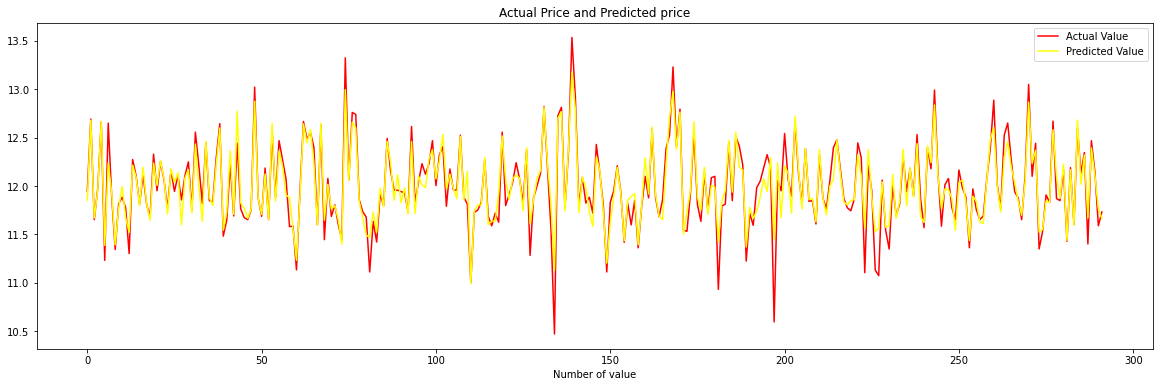

In [41]:
# Minh họa giá trị dự đoán so với giá thực
plt.figure(figsize=(20,6))
plt.plot(list(y_test), color = 'red', label = 'Actual Value')
plt.plot(y_pred_rfr, color = 'yellow', label = 'Predicted Value')
plt.title("Actual Price and Predicted price")
plt.xlabel("Number of value")
plt.legend()
plt.show()

*3. XGBoost*

In [51]:
# Khởi tạo mô hình XGBoost Regressor
xgb = XGBRegressor()

# Huấn luyện mô hình trên tập huấn luyện
xgb.fit(X_train, y_train)

# Dự đoán giá trị trên tập kiểm tra
y_pred_xgb = xgb.predict(X_test)

# Đánh giá mô hình bằng các chỉ số RMSE và R-square
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
medae = median_absolute_error(y_test, y_pred_xgb)

print("RMSE:", rmse)
print("R-squared:", r2)
print("MAE:", mae)
print("Median Absolute Error:", medae)

RMSE: 0.15097458203452252
R-squared: 0.8778581282079446
MAE: 0.09696802661165627
Median Absolute Error: 0.06612589783214773


Đánh giá kết quả của mô hình XGBoost:
- RMSE (Root Mean Squared Error): 0.15097458203452252. Đây là độ đo đánh giá sai số trung bình của mô hình. Giá trị càng thấp thể hiện mô hình có khả năng dự đoán chính xác hơn.
- R-squared (Coefficient of Determination): 0.8778581282079446. Đây là độ đo đánh giá mức độ giải thích của mô hình đối với biến phụ thuộc. Giá trị càng gần 1 thể hiện mô hình có khả năng giải thích tốt hơn cho biến phụ thuộc.
- MAE (Mean Absolute Error): 0.09696802661165627. Đây là độ đo đánh giá sai số trung bình tuyệt đối của mô hình. Giá trị càng thấp thể hiện mô hình có khả năng dự đoán chính xác hơn.
- Median Absolute Error: 0.06612589783214773. Đây là độ đo đánh giá sai số trung vị tuyệt đối của mô hình. Giá trị càng thấp thể hiện mô hình có khả năng dự đoán chính xác hơn đối với giá trị trung vị.

Tổng quan, mô hình XGBoost cho thấy khả năng dự đoán tương đối tốt với các giá trị sai số và độ giải thích ổn định. Tuy nhiên, để có được một đánh giá toàn diện hơn, cần xem xét kết quả so sánh với mô hình khác và phân tích thêm các yếu tố khác như tối ưu hóa hyperparameter và kiểm tra tăng trưởng mô hình trên dữ liệu mới.

**Parameter**

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [54]:
import xgboost
regressor=xgboost.XGBRegressor()

In [55]:
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [56]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [57]:
%%time

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 20.8 s
Wall time: 5min 39s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_ite

In [58]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

RMSE: 0.13823004511483308
R-squared: 0.8976089966479996
MAE: 0.08884305087047162
Median Absolute Error: 0.05974813061771478


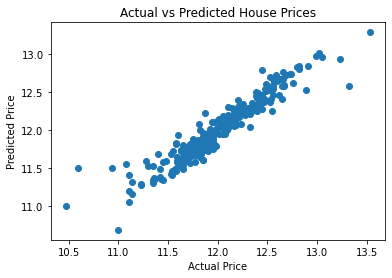

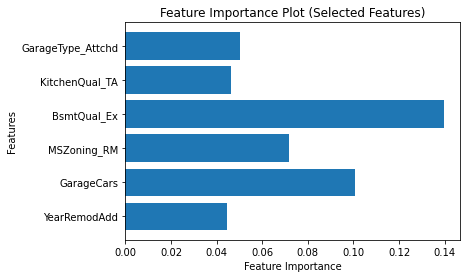

In [59]:
# Tính toán các chỉ số đánh giá khác

y_pred_hpxg = random_cv.best_estimator_.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_hpxg))
r2 = r2_score(y_test, y_pred_hpxg)
mae = mean_absolute_error(y_test, y_pred_hpxg)
medae = median_absolute_error(y_test, y_pred_hpxg)

print("RMSE:", rmse)
print("R-squared:", r2)
print("MAE:", mae)
print("Median Absolute Error:", medae)

# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_hpxg)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Phân tích độ quan trọng của các đặc trưng
feature_importance = random_cv.best_estimator_.feature_importances_
# Lấy danh sách các feature có độ quan trọng lớn hơn 0.04
selected_features = X_train.columns[feature_importance > 0.04]

# Lấy chỉ số và độ quan trọng tương ứng với các feature được chọn
selected_importance = feature_importance[feature_importance > 0.04]

# Vẽ biểu đồ độ quan trọng cho các feature được chọn
plt.barh(range(len(selected_features)), selected_importance, align='center')
plt.yticks(range(len(selected_features)), selected_features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot (Selected Features)")
plt.show()

Đánh giá kết quả của mô hình Hyper_XGBoost:
- RMSE (Root Mean Squared Error): 0.13823004511483308. Đây là độ đo đánh giá sai số trung bình của mô hình. Giá trị càng thấp thể hiện mô hình có khả năng dự đoán chính xác hơn.
- R-squared (Coefficient of Determination): 0.8976089966479996. Đây là độ đo đánh giá mức độ giải thích của mô hình đối với biến phụ thuộc. Giá trị càng gần 1 thể hiện mô hình có khả năng giải thích tốt hơn cho biến phụ thuộc.
- MAE (Mean Absolute Error): 0.08884305087047162. Đây là độ đo đánh giá sai số trung bình tuyệt đối của mô hình. Giá trị càng thấp thể hiện mô hình có khả năng dự đoán chính xác hơn.
- Median Absolute Error: 0.05974813061771478. Đây là độ đo đánh giá sai số trung vị tuyệt đối của mô hình. Giá trị càng thấp thể hiện mô hình có khả năng dự đoán chính xác hơn đối với giá trị trung vị.

Tổng quan, mô hình Hyper_XGBoost cho thấy khả năng dự đoán tốt hơn so với mô hình XGBoost cơ bản. Các giá trị sai số và độ giải thích đều được cải thiện, cho thấy mô hình có khả năng dự đoán chính xác hơn và giải thích tốt hơn biến phụ thuộc. Tuy nhiên, để có một đánh giá toàn diện hơn, cần xem xét kết quả so sánh với mô hình khác và phân tích thêm các yếu tố khác như tối ưu hóa hyperparameter và kiểm tra tăng trưởng mô hình trên dữ liệu mới.

**Hyper Parameter Random Forest**

In [60]:
# Khởi tạo mô hình Random Forest
rf = RandomForestRegressor()

# Khai báo không gian hyperparameter cần tìm kiếm
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Tạo đối tượng RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

In [61]:
# Fit mô hình với dữ liệu huấn luyện
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42)

In [62]:
# In ra các hyperparameter tốt nhất
print("Best Hyperparameters:", random_search.best_params_)

# In ra điểm số tốt nhất đạt được
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'n_estimators': 700, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 9}
Best Score: 0.8430156479477704


In [63]:
# Dự đoán trên tập kiểm tra
y_pred_hpfr = random_search.best_estimator_.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_hpfr))
r2 = r2_score(y_test, y_pred_hpfr)
mae = mean_absolute_error(y_test, y_pred_hpfr)
medae = median_absolute_error(y_test, y_pred_hpfr)

print("RMSE:", rmse)
print("R-squared:", r2)
print("MAE:", mae)
print("Median Absolute Error:", medae)

RMSE: 0.17059328116861483
R-squared: 0.8440516643536227
MAE: 0.11170014535230141
Median Absolute Error: 0.07503575071490864


Đánh giá kết quả của mô hình Hyper_RandomForest:
- RMSE (Root Mean Squared Error): 0.17059328116861483. Đây là độ đo đánh giá sai số trung bình của mô hình. Giá trị càng thấp thể hiện mô hình có khả năng dự đoán chính xác hơn.
- R-squared (Coefficient of Determination): 0.8440516643536227. Đây là độ đo đánh giá mức độ giải thích của mô hình đối với biến phụ thuộc. Giá trị càng gần 1 thể hiện mô hình có khả năng giải thích tốt hơn cho biến phụ thuộc.
- MAE (Mean Absolute Error): 0.11170014535230141. Đây là độ đo đánh giá sai số trung bình tuyệt đối của mô hình. Giá trị càng thấp thể hiện mô hình có khả năng dự đoán chính xác hơn.
- Median Absolute Error: 0.07503575071490864. Đây là độ đo đánh giá sai số trung vị tuyệt đối của mô hình. Giá trị càng thấp thể hiện mô hình có khả năng dự đoán chính xác hơn đối với giá trị trung vị.

Tổng quan, mô hình Hyper_RandomForest cho thấy khả năng dự đoán khá tốt, có một chút cải thiện so với mô hình RandomForest cơ bản. Các giá trị sai số và độ giải thích đều khá ổn định và gần giá trị của mô hình RandomForest. Tuy nhiên, cần xem xét kết quả so sánh với các mô hình khác và phân tích thêm để đưa ra đánh giá chính xác hơn về mô hình.

**Summarize**